# MAKE A MODEL ON TITANIC SHIP SURVIVED PEOPLE

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [62]:
df = pd.read_csv("C:/Users/Hp/Downloads/titanic/train.csv")
df  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
df.head()
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
m=df["Age"].mean()
print(m)
df["Age"].fillna(df["Age"].mean(),inplace=True)

29.69911764705882


In [66]:
k=df["Embarked"].mode()
print(k)
df["Embarked"].fillna(k[0],inplace=True)

0    S
Name: Embarked, dtype: object


In [67]:
n=df["Cabin"].mode()
n

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## VISUALIZATION OF THE DATA

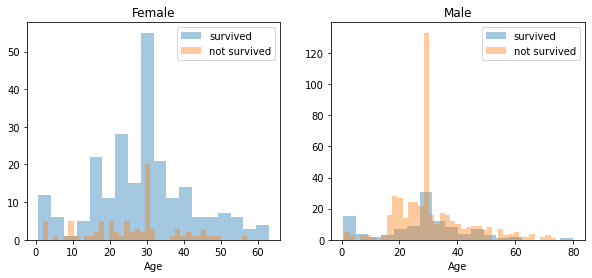

In [69]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

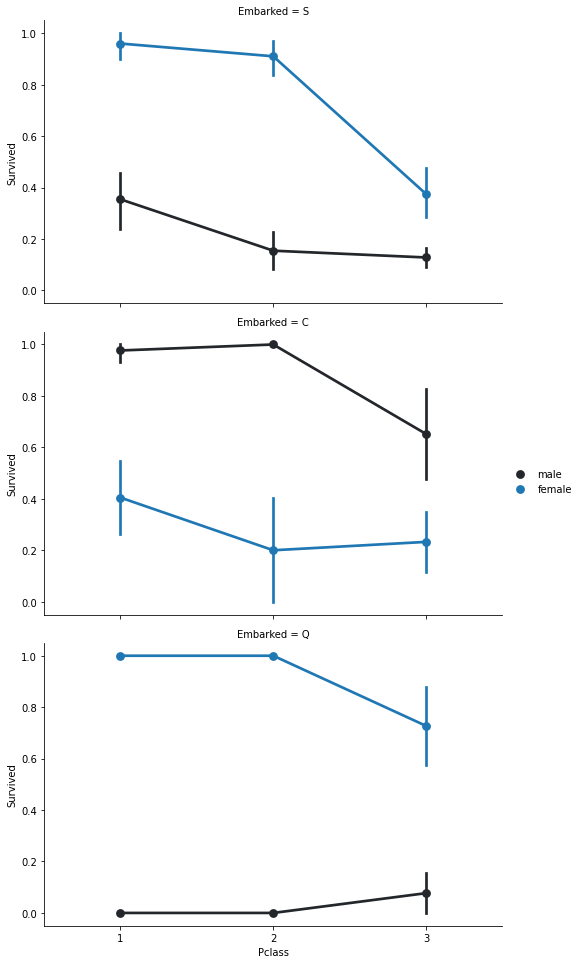

In [70]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

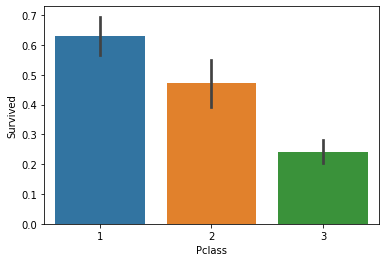

In [71]:
sns.barplot(x='Pclass', y='Survived', data=df)


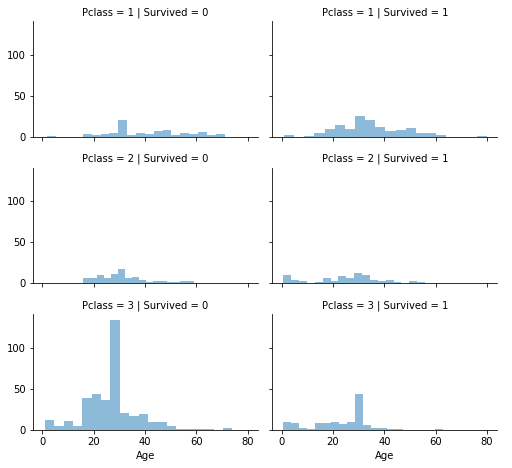

In [72]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [73]:
fd = pd.read_csv("C:/Users/Hp/Downloads/titanic/test.csv")
fd   

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [74]:
fd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [76]:
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


### USING RANDOM FOREST MODEL

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [78]:
y = df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [79]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [80]:
features = ["Pclass","Sex","SibSp","Parch","Embarked","Age"]
print(features)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age']


In [81]:
x = pd.get_dummies(df[features])
x_test = pd.get_dummies(fd[features])
print(x)
print(x_test)

     Pclass  SibSp  Parch        Age  Sex_female  Sex_male  Embarked_C  \
0         3      1      0  22.000000           0         1           0   
1         1      1      0  38.000000           1         0           1   
2         3      0      0  26.000000           1         0           0   
3         1      1      0  35.000000           1         0           0   
4         3      0      0  35.000000           0         1           0   
..      ...    ...    ...        ...         ...       ...         ...   
886       2      0      0  27.000000           0         1           0   
887       1      0      0  19.000000           1         0           0   
888       3      1      2  29.699118           1         0           0   
889       1      0      0  26.000000           0         1           1   
890       3      0      0  32.000000           0         1           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0      

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(x_train)
print(x_test)

     Pclass  SibSp  Parch        Age  Sex_female  Sex_male  Embarked_C  \
873       3      0      0  47.000000           0         1           0   
257       1      0      0  30.000000           1         0           0   
862       1      0      0  48.000000           1         0           0   
292       2      0      0  36.000000           0         1           1   
190       2      0      0  32.000000           1         0           0   
..      ...    ...    ...        ...         ...       ...         ...   
825       3      0      0  29.699118           0         1           0   
251       3      1      1  29.000000           1         0           0   
521       3      0      0  22.000000           0         1           0   
325       1      0      0  36.000000           1         0           1   
281       3      0      0  28.000000           0         1           0   

     Embarked_Q  Embarked_S  
873           0           1  
257           0           1  
862           0      

In [83]:
model = RandomForestClassifier(n_estimators=100, criterion='gini')
model.fit(x_train,y_train)
model

RandomForestClassifier()

In [84]:
ab = model.predict(x_test)
print(ab)

[1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0]


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [86]:
model.score(x_test,y_test)

0.7947761194029851

In [87]:
aa = confusion_matrix(ab,y_test)
print(aa)

[[141  34]
 [ 21  72]]


In [88]:
from sklearn.metrics import classification_report

In [89]:
ff = classification_report(ab,y_test)
print(ff)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       175
           1       0.68      0.77      0.72        93

    accuracy                           0.79       268
   macro avg       0.77      0.79      0.78       268
weighted avg       0.80      0.79      0.80       268



#### HYPERPARAMETER TUNING 

In [90]:
### using n_estimators 
n_estimators=[1,2,4,8,16,32,64,100,200]

accuracy_results=[]
i=0
for estimator in n_estimators:
    
    rf=RandomForestClassifier( 
        n_estimators=estimator,n_jobs=-1)## n_jobs=-1 means the available processors in your system start doing processing on it
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    accuracy_results.append(acc)
    print("accuracy result at n_estimator ", estimator,"is",accuracy_results[i],"\n\n")
    i=i+1
    
print("accuracy_results at different values of n_estimators",accuracy_results)

accuracy result at n_estimator  1 is 0.8022388059701493 


accuracy result at n_estimator  2 is 0.7686567164179104 


accuracy result at n_estimator  4 is 0.8134328358208955 


accuracy result at n_estimator  8 is 0.8134328358208955 


accuracy result at n_estimator  16 is 0.8022388059701493 


accuracy result at n_estimator  32 is 0.7947761194029851 


accuracy result at n_estimator  64 is 0.7985074626865671 


accuracy result at n_estimator  100 is 0.7985074626865671 


accuracy result at n_estimator  200 is 0.8059701492537313 


accuracy_results at different values of n_estimators [0.8022388059701493, 0.7686567164179104, 0.8134328358208955, 0.8134328358208955, 0.8022388059701493, 0.7947761194029851, 0.7985074626865671, 0.7985074626865671, 0.8059701492537313]


##### CONFUSION MATRIX   VISUALIZE

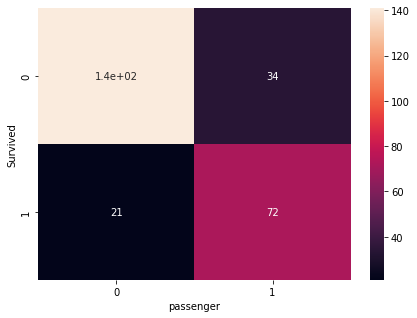

In [91]:
plt.figure(figsize=(7,5))
sns.heatmap(aa, annot =True)
plt.xlabel('passenger')
plt.ylabel('Survived')
plt.show()

###### ROC AND AUC CURVE

In [92]:
from sklearn.metrics import roc_curve,roc_auc_score
roc_auc = roc_auc_score(y_test, ab)
roc_auc

0.774807826694619

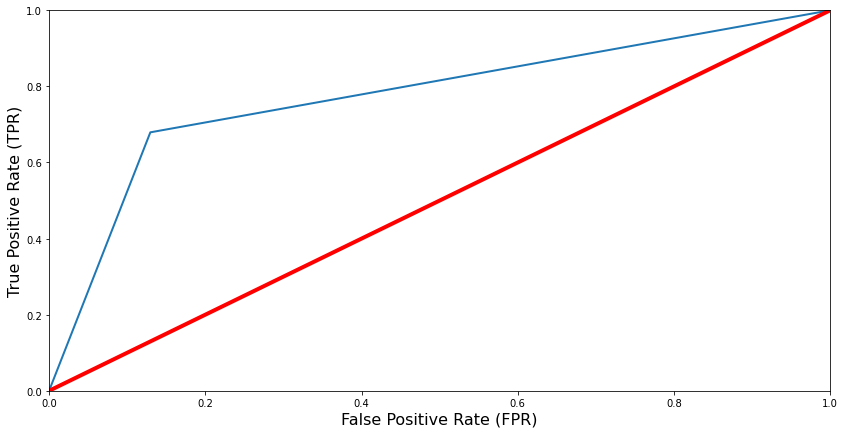

In [93]:
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ab)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()